# Cleaning Anime Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys
sys.path.append(os.pardir)

from ptb_dataset import ptb

## Load anime.csv

In [2]:
ROOT_PATH   = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
SOURCE_PATH = ROOT_PATH + '/gen_data'

In [3]:
df = pd.read_csv(SOURCE_PATH + '/anime.csv')
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,ONA,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop ONA and Unknown type of anime

In [4]:
df.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Unknown'], dtype=object)

In [5]:
df = df[df.Type.isin(['TV', 'Movie', 'OVA', 'Special'])]
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop Rows with Missing Value

In [6]:
df = df.dropna(axis=0)
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,TV,"Sci-Fi, Space, Vampire",The first astronaut in human history was a vam...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...
17559,48488,Higurashi no Naku Koro ni Sotsu,TV,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
17560,48491,Yama no Susume: Next Summit,TV,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


## Drop Rows with Unusable Synopsis

In [7]:
ban_words = {'no synopsis', 'anime', 'animation', 'animated', 'movie', 'cinema', 'film', 'screened', 
             'tv series', 'manga', 'novel', 'prequel', 'sequel', 'compilation', 'recap', 'project',
             'summary', 'based on', 'season', 'half', 'commercial', 'episode', 'condensed', 'collection',
             'ova', 'dvd', 'blu-ray', 'bd', 'spin-off', 'spin off', 'station ID', 'chapter', 'television',
             'continuation', 'advertisement', 'tv show', 'tv program', 'tv special', 'promotional', 'aired', 
             'graduation', 'safety', 'educational', 'retelling', 'remake', 'released', 'collaboration'}

In [8]:
for word in ban_words:
    print(word, df.Synopsis.str.contains(word, case=False).sum())

continuation 60
aired 437
educational 229
advertisement 18
based on 873
graduation 57
tv series 193
collection 98
manga 674
season 535
ova 476
remake 29
dvd 667
spin-off 31
bd 227
tv show 12
condensed 10
commercial 131
blu-ray 332
recap 270
summary 76
screened 67
released 307
television 132
no synopsis 665
sequel 116
film 825
prequel 36
station ID 11
promotional 34
anime 935
compilation 66
movie 588
tv special 53
episode 1199
collaboration 66
animated 315
spin off 2
cinema 37
tv program 9
novel 201
project 197
half 187
retelling 40
chapter 66
animation 519
safety 207


In [9]:
for word in ban_words:
    df = df[~df.Synopsis.str.contains(word, case=False)]

In [10]:
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",Witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...
17549,48438,Mahoutsukai no Yome: Nishi no Shounen to Seira...,OVA,"Slice of Life, Magic, Fantasy, Shounen",The story takes place shortly before Cartaphil...
17553,48466,Kyoukai Senki,TV,"Action, Mecha","In the year 2061 AD, Japan has lost its sovere..."
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",The stage is Shibuya. When Ryuuhei Oda was in ...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",Miko is a typical high school student whose li...


## Clean Synopsis for NLP

### To lower case

In [11]:
df['Synopsis'] = df.Synopsis.str.lower()
df.head()

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","in the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space","another day, another bounty—such is the life o..."
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","vash the stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",it is the dark century and the people are suff...


### Remove Non-alphabetic Characters

In [12]:
def remove_nonalpha(text):
    result = [c if c.isalpha() else ' ' for c in text]
    return ''.join(result)

df['Synopsis'] = df.Synopsis.apply(remove_nonalpha)
df.head()

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",in the year humanity has colonized sever...
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space",another day another bounty such is the life o...
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",vash the stampede is the man with a ...
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",witches are individuals with special powers li...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",it is the dark century and the people are suff...


### Remove Stopwords

In [13]:
!wget -nc -q https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt

f = open('stopwords-en.txt', 'r')
stopwords = set(f.read().splitlines())
f.close()

In [14]:
def remove_stopword(text):
    words = text.split()
    result = [w for w in words if w not in stopwords]
    return " ".join(result)

df['Synopsis'] = df.Synopsis.apply(remove_stopword)
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",humanity colonized planets moons solar leaving...
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space",day bounty life unlucky crew bebop routine int...
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",vash stampede bounty head reason merciless vil...
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",witches individuals special powers esp telekin...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",dark century people suffering rule devil vande...
...,...,...,...,...,...
17549,48438,Mahoutsukai no Yome: Nishi no Shounen to Seira...,OVA,"Slice of Life, Magic, Fantasy, Shounen",story takes shortly cartaphilus nap chise audi...
17553,48466,Kyoukai Senki,TV,"Action, Mecha",japan lost sovereignty japanese people spend d...
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",stage shibuya ryuuhei oda elementary school ad...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",miko typical school student life upside sudden...


### Remove Non-PTB Words

In [15]:
word_to_id, id_to_word = ptb.load_vocab()

ptb_words = set(word_to_id.keys())

In [16]:
def remove_nonptb(text):
    words = text.split()
    result = [w for w in words if w in ptb_words]
    return " ".join(result)

df['Synopsis'] = df.Synopsis.apply(remove_nonptb)
df.head()

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",solar leaving surface planet earth solar polic...
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space",day life crew routine interrupted chasing targ...
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",head reason waste oppose entire cities fun tit...
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",individuals special powers mind control robin ...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",dark century people suffering rule manipulate ...


### Remove Unusable Words

In [17]:
ban_words = {'short', 'story', 'stories', 'video', 'series', 'extra', 'version', 'special',
             'included', 'created', 'continuing', 'continued', 'continues',
             'featuring', 'involving', 'involved', 'plot', 'named', 'chan'}

In [18]:
def remove_banword(text):
    words = text.split()
    result = [w for w in words if w not in ban_words]
    return " ".join(result)

df['Synopsis'] = df.Synopsis.apply(remove_banword)
df

,MAL_ID,Name,Type,Genre,Synopsis
0,1,Cowboy Bebop,TV,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",solar leaving surface planet earth solar polic...
1,5,Cowboy Bebop: Tengoku no Tobira,Movie,"Action, Drama, Mystery, Sci-Fi, Space",day life crew routine interrupted chasing targ...
2,6,Trigun,TV,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",head reason waste oppose entire cities fun tit...
3,7,Witch Hunter Robin,TV,"Action, Mystery, Police, Supernatural, Drama, ...",individuals powers mind control robin craft us...
4,8,Bouken Ou Beet,TV,"Adventure, Fantasy, Shounen, Supernatural",dark century people suffering rule manipulate ...
...,...,...,...,...,...
17549,48438,Mahoutsukai no Yome: Nishi no Shounen to Seira...,OVA,"Slice of Life, Magic, Fantasy, Shounen",takes shortly academy friends prepare academy ...
17553,48466,Kyoukai Senki,TV,"Action, Mecha",japan lost sovereignty japanese people spend d...
17554,48470,D_Cide Traumerei,TV,"Action, Adventure, Drama, Magic, Fantasy",stage school brother death brother nightmare s...
17558,48483,Mieruko-chan,TV,"Comedy, Horror, Supernatural",typical school student life upside suddenly st...


### Drop Rows with Empty Synopsis

In [19]:
df = df[df.Synopsis.str.len() != 0]

## Distribution - Length of Cleaned Synopsis

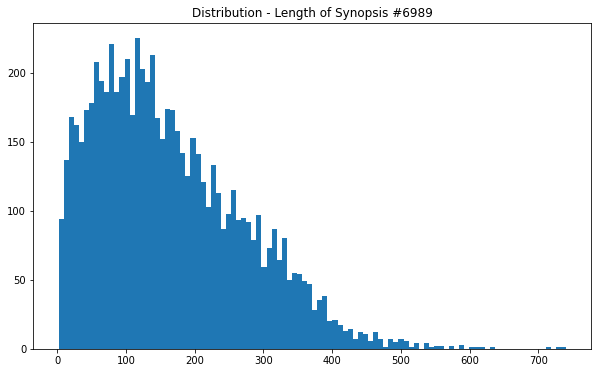

In [20]:
synlen = df.Synopsis.str.len()

plt.figure(figsize=(10, 6))
plt.hist(synlen, bins=100)
plt.title('Distribution - Length of Synopsis #%d' %len(synlen))
plt.show()

## Plot Distribution of Genre

In [21]:
genre_list = list(set(df.Genre.str.split(', ').sum()))

genre_cnt = []
for genre in genre_list:
    cnt = df.Genre.str.contains(genre).sum()
    genre_cnt.append(cnt)

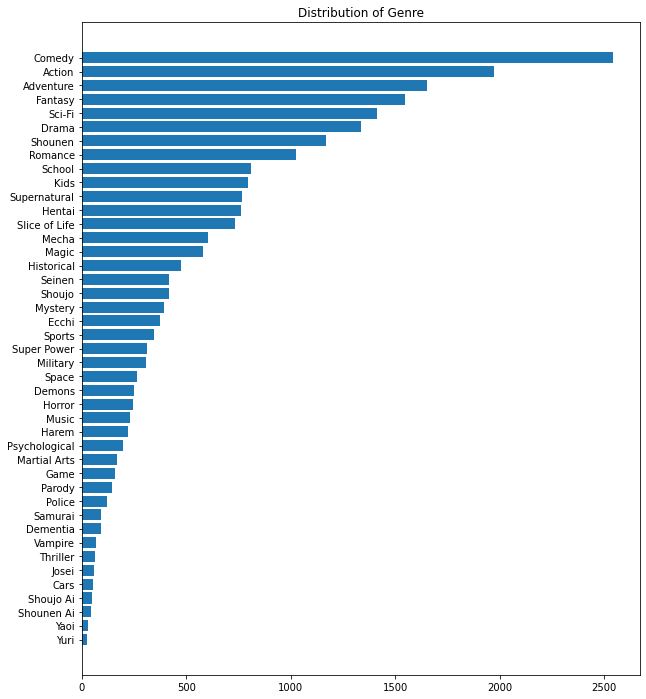

In [22]:
sorted_genre_list = [x for _, x in sorted(zip(genre_cnt, genre_list))]
sorted_genre_cnt  = sorted(genre_cnt)

plt.figure(figsize=(10, 12))
plt.barh(sorted_genre_list, sorted_genre_cnt)
plt.title('Distribution of Genre')
plt.show()

## Split Data to Metadata, Genre, Synopsis

In [23]:
metadata = df[['MAL_ID', 'Name', 'Type']].copy()
genre    = df[['MAL_ID', 'Genre']].copy()
synopsis = df[['MAL_ID', 'Synopsis']].copy()

del df

## Encode Genre to 0-1 Vector

In [24]:
genre.head()

,MAL_ID,Genre
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,"Adventure, Fantasy, Shounen, Supernatural"


In [25]:
genre_list.sort()

for gen in genre_list:
    genre[gen] = genre.Genre.str.contains(gen).astype(int)

genre_str = genre[['MAL_ID', 'Genre']]
genre = genre.drop('Genre', axis=1)

In [26]:
genre.head()

,MAL_ID,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Save Cleaned Data

In [27]:
df_and_name =((metadata, 'metadata'),
              (genre,    'genre'   ),
              (synopsis, 'synopsis'))

for df, name in df_and_name:
    file_name = f'{name}.csv'
    df.to_csv(file_name, index=False)